In [2]:
import matplotlib.pyplot as plt
from keras.src.legacy.backend import dtype
from networkx.algorithms.bipartite.basic import color
from tensorflow.python.ops.gen_math_ops import squared_difference

'''
    神经层:
    核心神经层(Core layers)
    卷积神经层(Convolution layers)
    池化神经层(Pooling Layers)
    循环神经层(Recurrent Layers)
    前置神经层(PreProcessing Layers)
    常态化神经层(Normalization Layers)
    正则神经层(Regularization Layers)
    注意力神经层(Attention Layers)
    维度重置神经层(Reshaping Layers)
    合并神经层(Merging Layers)
    激励神经层(Activation Layers)
'''
# 完全连接神经层
import tensorflow as tf
layers = tf.keras.layers

#建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',name='layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax',name='layer2')
])

#设定优化器、损失函数、效果衡量指标
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#显示模型汇总
model.summary()

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

In [11]:
import inspect
#设定模型的output为第一层Dense,显示第一层Dense output个数(128)
#设定模型的input/output
feature_extractor = tf.keras.Model(inputs=model.inputs,
                                   outputs=model.get_layer('layer2').output)
#使用feature_extractor取得output
x = tf.ones((1,28,28))
features = feature_extractor(x)
# features.shape

#第一层Dense的参数个数计算
parameter_count = 128 * features.shape[1] + features.shape[1]
#第一层的参数个数: 100480, 第二层的参数个数: 1290
print(f'参数(parameter)个数:{parameter_count}')


# Dense层的参数
# help(tf.keras.layers.Dense)
print(inspect.getsource(tf.keras.layers.Dense))

参数(parameter)个数:1290
@keras_export("keras.layers.Dense")
class Dense(Layer):
    """Just your regular densely-connected NN layer.

    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`).

    Note: If the input to the layer has a rank greater than 2, `Dense`
    computes the dot product between the `inputs` and the `kernel` along the
    last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
    For example, if input has dimensions `(batch_size, d0, d1)`, then we create
    a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
    of the `input`, on every sub-tensor of shape `(1, 1, d1)` (there are
    `batch_size * d0` such sub-tensors). The output in this 

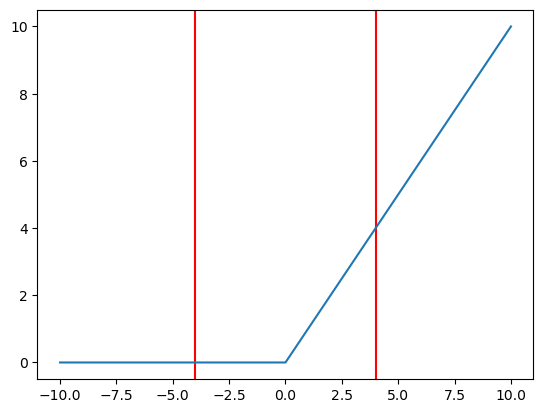

In [8]:
from keras.api import activations
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
'''
    激活函数
'''
x = np.linspace(-10,10,21)
x_tf = tf.constant(x,dtype=tf.float32)

#relu
'''
    relu函数有三个参数
    threshold: 超过此阈值,y才会大于0.
    max_value: y的上限
    alpha: 小于阈值,y = α * x。 α = 0.5,称为Parameteric rectified linear unit(PReLU),
    alpha = 0.01,则称为Leaky rectified linear unit(Leaky ReLU)
'''
y = activations.relu(x_tf).numpy()


#绘图
plt.plot(x,y)
plt.show()

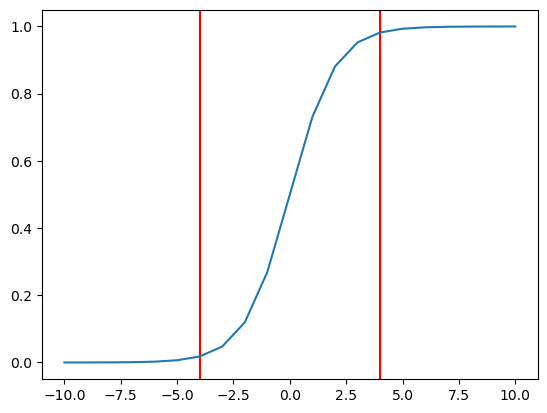

In [9]:
import tensorflow as tf
from keras.api import activations
import matplotlib.pyplot as plt
import numpy as np
'''
sigmoid: Logistic回归,函数为S型,适用于二分类,可加在最后一层Dense中
    函数最小值是0,最大值是1,两条直线之间是模糊地带,但也是一个平滑改变的过程,
    而非阶梯型的函数,可降低预测的变异性
'''
x = np.linspace(-10,10,21)
x_tf = tf.constant(x,dtype=tf.float32)

y = activations.sigmoid(x_tf).numpy()

#模糊地带
plt.axvline(-4,color='r')
plt.axvline(4,color='r')

plt.plot(x,y)
plt.show()



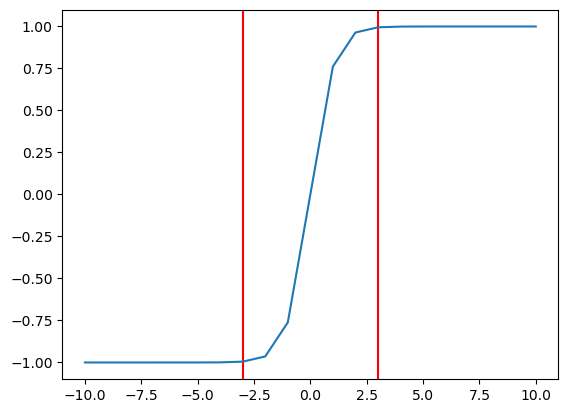

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.api import activations
'''
    tanh函数,平滑改变的过程与sigmoid相比较为陡峭
'''
x = np.linspace(-10,10,21)
x_tf = tf.constant(x,dtype=tf.float32)

y = activations.tanh(x_tf).numpy()

#模糊地带
plt.axvline(-3,color='r')
plt.axvline(3,color='r')

plt.plot(x,y)
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
from keras.api import activations
'''
    softmax函数:这个函数会将输入转化为概率,即所有值介于(0,1),总和为1,适用于多分类,可
    加在最后一层Dense中。
'''
#设定x为均匀分布,转换后,每一行的总和为1.`
x = np.random.uniform(1,10,40).reshape(10,4)
print('输入: \n',x)
x_tf = tf.constant(x,dtype=tf.float32)

# softmax,输入必须是二维数据
y = activations.softmax(x_tf).numpy()
print('加总:', np.round(np.sum(y,axis=1)))

输入: 
 [[1.21024542 9.3281665  3.92997095 4.87891147]
 [6.98387316 1.31836089 4.20305793 6.10498752]
 [5.42465634 8.55866683 4.2664356  1.71796206]
 [1.86053736 2.34403409 1.61989553 8.68046836]
 [5.0757642  8.0512366  4.812716   9.69284888]
 [2.14840751 9.21109295 5.50008592 1.44249783]
 [6.64726779 3.51683485 6.05260404 8.70035197]
 [9.35808072 8.56828669 8.06806399 4.00509118]
 [6.51609823 3.77739661 2.73316854 6.33756821]
 [9.35879876 2.9887897  4.05497118 4.27881553]]
加总: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
'''
    损失函数(Loss Functions),tensorflow损失函数分为三类:
    1)概率相关的损失函数(Probabilistic Loss): 如二分类的交叉熵(Binary Crossentropy)、多分类的交叉熵(CategoticalCrossentropy)
    2)回归相关的损失函数(Regression Loss): 如均方误差
    3)铰链损失函数(Hinge Loss)。经常用在最大间格分类,适用于支持向量机(SVM)等算法

'''
import tensorflow as tf

# 使用sigmoid计算，就可以得到BinaryCrossentropy损失函数
y_true = [[0.,1.],[0.,0.]] #实际值
y_pred = [[0.6,0.4],[0.4,0.6]]

# 二分类的交叉熵损失函数
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true,y_pred).numpy())

print("===============================多分类的交叉熵====================")
y_true = [[0.,1.,0.],[0.,0.,1.]]
y_pred = [[0.05,0.95,0.],[0.8,0.1,0.1]]

#多分类交叉熵(CategoricalCrossentropy)
cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true,y_pred).numpy())

print("===============================稀疏矩阵的多分类交叉熵====================")
y_true = tf.constant([1,2],dtype=tf.float32)  # 稀疏标签应该是0-based索引
y_pred = tf.constant([[0.05,0.95,0],[0.8,0.1,0.1]],dtype=tf.float32)

scce = tf.keras.losses.SparseCategoricalCrossentropy()
print(scce(y_true,y_pred).numpy())

print("==============MeanSquaredError======================")
#MeanSquaredError,计算实际值与预测值的均方误差
y_true = [[0.,1.],[0.,0.]] #实际值
y_pred = [[1.,1.],[0.,0.]] #预测值

#多分类交叉熵(CategoricalCrossentropy)
mse = tf.keras.losses.MeanSquaredError()
print(mse(y_true,y_pred).numpy())

print("===================铰链损失函数======================")
#常用于支持向量机
y_true = [[0.,1],[0.,0.]]
y_pred = [[0.6,0.4],[0.4,0.6]]

hinge = tf.keras.losses.Hinge()
print(hinge(y_true,y_pred).numpy())

print("========================自定义损失函数=================")
def my_loss(y_true,y_pred):
    #MSE
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

# model.compile(optimizer='adam', loss=my_loss)

0.8149245
===============================多分类的交叉熵====================
1.1769392
===============================稀疏矩阵的多分类交叉熵====================
1.1769392
==============MeanSquaredError======================
0.25
===================铰链损失函数======================
1.3
========================自定义损失函数=================


NameError: name 'model' is not defined

In [1]:
'''
    优化器: 是神经网络中反向传导的求解方法,主要用在以下两方面,
    1)设定学习率的变化,加速求解的收敛速度。
    2)避开马鞍点(Saddle Point)等局部最小值,并且找到全局的最小值
    优化器的类别在model.compile()中设置
    常见的优化器:
    SGD
    RMSprop
    Adam
    AdadeLta
    Adagrad
    Adamax
    Nadam
    Ftrl
'''
'''
    1.随机梯度下降法
    依据权重更新的时机差别,梯度下降法分为三种:
    1)批量梯度下降法(BGD)
    2)随机梯度下降法
    3)小批量梯度下降法
    小批量梯度下降法可能包含前两种,批量为全部样本,即为BGD;批量为1,即为SGD。
'''
import tensorflow as tf

#SGD
tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name="SGD",
)
# ① 权重更新公式为: w = w -learning_rate * g  w为权重,g为梯度,learning_rate为学习率
# ② momentum为动量,momentum=0,则不考虑动量, momentum=1,则考虑动量, momentum=0.9,则考虑动量
#   velocity = momentum * velocity - learning_rate * g
#   w = w + velocity  动能通常介于(0,1),若momentum=0,则学习率为固定值,一般刚开始学习率比较大,越接近最小值时,学习率
#   越小,以免错过最小值


help(tf.keras.optimizers.SGD)

Help on class SGD in module keras.src.optimizers.sgd:

class SGD(keras.src.optimizers.optimizer.Optimizer)
 |  SGD(learning_rate=0.01, momentum=0.0, nesterov=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False, ema_momentum=0.99, ema_overwrite_frequency=None, loss_scale_factor=None, gradient_accumulation_steps=None, name='SGD', **kwargs)
 |
 |  Gradient descent (with momentum) optimizer.
 |
 |  Update rule for parameter `w` with gradient `g` when `momentum` is 0:
 |
 |  ```python
 |  w = w - learning_rate * g
 |  ```
 |
 |  Update rule when `momentum` is larger than 0:
 |
 |  ```python
 |  velocity = momentum * velocity - learning_rate * g
 |  w = w + velocity
 |  ```
 |
 |  When `nesterov=True`, this rule becomes:
 |
 |  ```python
 |  velocity = momentum * velocity - learning_rate * g
 |  w = w + momentum * velocity - learning_rate * g
 |  ```
 |
 |  Args:
 |      learning_rate: A float, a
 |          `keras.optimizers.schedules.LearningRateSch

In [3]:
import tensorflow as tf

# 定义优化器、变量、损失函数
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(1.0)
loss = lambda: (var ** 2) / 2.0  # 损失函数简化为 var（因为 (var*2)/2 = var）

for i in range(51):
    # Tensorflow2.X的SGD优化器中没有minimize方法,使用下面的代码
    # step_count = opt.minimize(loss, [var]).numpy()
    with tf.GradientTape() as tape:
        #计算当前的损失值,用于比较与模型预测值与真实值之间的差距
        current_loss = loss()
    #基于损失值,找调整方向,tape利用前面记录的操作,算出损失current_loss对var的敏感度,
    # 也就是梯度grads。类似于梯度告诉你,如果我爸参数var稍微改一点,损失会变大还是变小,变多少
    # [var]是一个参数列表.grads也是一个列表,里面存放着每个参数的调整建议。
    grads = tape.gradient(current_loss, [var])
    # apply_gradients根据grads的调整建议进行调参,让误差变小,opt是优化器
    opt.apply_gradients(zip(grads, [var]))
    if i % 10 == 0 and i > 0:
        print(f"Step {i}: {var.numpy()}")

#随着执行步数增多,损失值越来越小

Step 10: 0.3138105869293213
Step 20: 0.10941898822784424
Step 30: 0.03815204277634621
Step 40: 0.013302796520292759
Step 50: 0.004638398066163063


In [10]:
'''
    优化三次测试随机梯度下降法的动能
'''
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(1.0)

#损失函数起始值
val0 = var.value()
print(f'val0:{val0}')

#损失函数
loss = lambda : (var ** 2) / 2.0

for i in range(3):
    initValue = var
    with tf.GradientTape() as tape:
        current_loss = loss()
    grads = tape.gradient(current_loss, [var])
    opt.apply_gradients(zip(grads, [var]))
    if i > 0:
         print(f"Step {i}: {var.numpy()},---->{(initValue - var).numpy()}")

val0:1.0
Step 1: 0.7199999690055847,---->0.0
Step 2: 0.4860000014305115,---->0.0


In [19]:
'''
    Adam优化器
'''
import tensorflow as tf
tf.keras.optimizers.Adam(
    learning_rate=0.001, #学习率
    beta_1=0.9, #一阶动能衰减率
    beta_2=0.999, # 二阶动能衰减率
    epsilon=1e-7, # 误差值,小于这个值,优化即停止
    amsgrad=False, # 是否使用AMSGrad,默认值是False
    name="Adam", #
)

#Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.1,epsilon=0.1)
# 定义变量和损失函数
var = tf.Variable(1.0)
loss = lambda: (var ** 2) / 2.0

#优化的步骤
for i in range(12):
    with tf.GradientTape() as tape:
        current_loss = loss()
    grads = tape.gradient(current_loss,[var])
    opt.apply_gradients(zip(grads,[var]))
    if i >= 0:
        print(f"Step {i}: {var.numpy()}")

Step 0: 0.9759748578071594
Step 1: 0.9453564882278442
Step 2: 0.9106557369232178
Step 3: 0.8731074929237366
Step 4: 0.8334801197052002
Step 5: 0.7923160791397095
Step 6: 0.7500312924385071
Step 7: 0.706963300704956
Step 8: 0.6633984446525574
Step 9: 0.6195876598358154
Step 10: 0.5757566690444946
Step 11: 0.5321123600006104


In [5]:
'''
优化三次测试随机梯度下降法的功能
'''
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(1.0)
#损失函数的起始值
val0 = var.value()
print(f'val0:{val0}')

#损失函数
loss = lambda : (var ** 2) / 2.0
#优化第一次,minimize函数是tf1.X的功能
# step_count = opt.minimize(loss, [var]).numpy()
with tf.GradientTape() as tape:
    #计算损失
    current_loss = loss()
#计算梯度
grads = tape.gradient(current_loss, [var])
#应用梯度更新变量
opt.apply_gradients(zip(grads, [var]))
val1 = var.numpy()
print(f'优化的步骤:{1},val1:{val1},变化值:{val0 - val1}')

#优化第二次
with tf.GradientTape() as tape:
    current_loss = loss()
grads = tape.gradient(current_loss, [var])
opt.apply_gradients(zip(grads, [var]))
val2 = var.numpy()
print(f'优化的步骤:{2},val2:{val2},变化值:{val1 - val2}')

#优化第三次
with tf.GradientTape() as tape:
    current_loss = loss()
grads = tape.gradient(current_loss, [var])
opt.apply_gradients(zip(grads, [var]))
val3 = var.numpy()
print(f'优化的步骤:{3},val3:{val3},变化值:{val2 - val3}')

val0:1.0
优化的步骤:1,val1:0.8999999761581421,变化值:0.10000002384185791
优化的步骤:2,val2:0.7199999690055847,变化值:0.18000000715255737
优化的步骤:3,val3:0.4860000014305115,变化值:0.23399996757507324


tn:2,fp:1,fn:2,tp:3


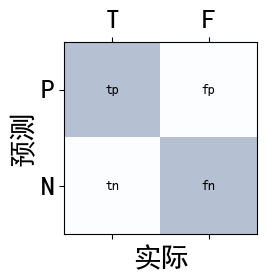

In [2]:
'''
    效果衡量指标
'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,confusion_matrix

y_true = [0,0,0,1,1,1,1,1] #实际值
y_pred = [0,1,0,1,0,1,0,1] #预测值

# 混淆矩阵
tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
print(f'tn:{tn},fp:{fp},fn:{fn},tp:{tp}')

#绘图
#修正中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#显示矩阵
fig, ax = plt.subplots(figsize=(2.5,2.5))

# 1:蓝色;0:白色
ax.matshow([[1,0],[0,1]], cmap=plt.cm.Blues,alpha=0.3)

#标示文字
ax.text(x = 0, y =0,s = 'tp',va = 'center',ha = 'center')
ax.text(x = 1, y =0,s = 'fp',va = 'center',ha = 'center')
ax.text(x = 0, y =1,s = 'tn',va = 'center',ha = 'center')
ax.text(x = 1, y =1,s = 'fn',va = 'center',ha = 'center')

plt.xlabel('实际',fontsize=20)
plt.ylabel('预测',fontsize=20)

# x/y标签
plt.xticks([0,1],['T','F'],fontsize=20)
plt.yticks([0,1],['P','N'],fontsize=20)

plt.show()